# Modern Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session H - Time Series

This lesson, we will learn how to handle time data with a stock case,including reading the time series,DateOffset and TimeDelta,Time Series Function.




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### Read the time series

In [2]:
import wget

link_to_data = 'https://github.com/tuliplab/mds/raw/master/Jupyter/data/gertek_2016_d.csv'
DataSet = wget.download(link_to_data)

In [3]:
goertek=pd.read_csv('gertek_2016_d.csv')
goertek.head()

,date,open,high,close,low,...,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2016-12-23,3333.40,3334.89,3307.60,3300.88,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
1,2016-12-22,3335.12,3340.36,3335.67,3322.72,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2,2016-12-21,3313.75,3342.48,3338.54,3313.75,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
3,2016-12-20,3328.30,3329.10,3309.06,3289.27,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
4,2016-12-19,3342.34,3344.86,3328.98,3325.00,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [6]:
type(goertek['date'])

pandas.core.series.Series

In [7]:
type(goertek['date'][0])

str

In [8]:
goertek['date']=pd.to_datetime(goertek['date'])
type(goertek['date'][0])

pandas._libs.tslib.Timestamp

In [9]:
goertek=goertek.set_index('date')
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [10]:
type(goertek.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
goertek=pd.read_csv('gertek_2016_d.csv',index_col='date',parse_dates=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [12]:
type(goertek.index)

pandas.core.indexes.datetimes.DatetimeIndex

### DateOffset and TimeDelta

In [13]:
lastday=pd.datetime(2016,12,31)
lastday

datetime.datetime(2016, 12, 31, 0, 0)

In [14]:
newyear=lastday+pd.DateOffset(days=1)
newyear

Timestamp('2017-01-01 00:00:00')

In [15]:
today=pd.datetime.now()
today

datetime.datetime(2018, 4, 27, 2, 13, 39, 762567)

In [ ]:
today+pd.DateOffset(weeks=1)

In [16]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2023-04-27 02:13:39.762567')

In [17]:
import datetime

In [18]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta

datetime.timedelta(7)

In [19]:
datetime.timedelta(7)

datetime.timedelta(7)

In [20]:
today=pd.datetime.now()

In [21]:
today+weekDelta

datetime.datetime(2018, 5, 4, 2, 13, 49, 19696)

### Time Series Function

In [22]:
goertek=goertek.sort_index(ascending=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-05,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-06,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0
2016-01-07,3481.150,3481.150,3294.384,3284.737,44102640.0,...,3643.533,3694.525,113886000.0,119773936.0,138700858.8
2016-01-08,3371.871,3418.851,3361.563,3237.931,185959456.0,...,3596.749,3681.449,130703180.8,123651742.4,141988050.4


In [23]:
goertek.tail()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4


In [24]:
goertek.shift(1).head(3)

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8


In [25]:
goertek.shift(1,freq=pd.datetools.bday).head(3)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.core.datetools.bday is deprecated and will be removed in a future version.
  if __name__ == '__main__':


,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-07,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0


In [26]:
goertek.asfreq('BM')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-29,2855.598,2965.309,2946.090,2854.371,113304256.0,...,3052.263,3178.529,110646072.0,111380396.8,122499499.2
2016-02-29,2939.580,2939.875,2877.467,2821.215,129341024.0,...,3026.766,2982.232,123694110.4,121202825.6,108902741.2
2016-03-31,3229.200,3241.927,3218.088,3208.665,121552072.0,...,3200.245,3138.345,107497318.4,138788992.8,129922554.0
2016-04-29,3153.537,3171.289,3156.745,3149.397,58029776.0,...,3180.772,3210.231,62888933.6,83644518.0,103044368.2
2016-05-31,3068.596,3170.926,3169.559,3068.596,138863104.0,...,3078.173,3094.970,75895244.0,69714819.6,74371733.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,3217.192,3225.418,3203.930,3198.683,88044840.0,...,3236.933,3235.643,102453550.4,95620234.4,112470896.4
2016-08-31,3310.565,3333.972,3327.793,3304.655,79570808.0,...,3330.161,3305.741,82890593.6,95886160.0,107540506.4
2016-09-30,3240.177,3260.940,3253.284,3239.036,44978024.0,...,3254.355,3279.082,54814162.4,57857660.8,72046803.6


In [27]:
goertek.asfreq('H',method='ffill')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04 00:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 01:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 02:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 03:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 04:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 20:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 21:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 22:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0


In [28]:
goertek_m=pd.read_csv('gertek_2016_d.csv',parse_dates=True,index_col='date')

In [29]:
goertek_m.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [30]:
goertek_resample=goertek_m.resample('30Min') #pandas 0.18 http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#resample-api

In [31]:
type(goertek_resample)

pandas.core.resample.DatetimeIndexResampler

In [32]:
goertek_resample.mean()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04 00:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 00:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-04 01:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-04 01:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 22:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-12-22 22:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-12-22 23:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


+ B, BM: This stands for business day, business month. These are the working
days of the month, that is, any day that is not a holiday or a weekend.
+  D, W, M, Q, A: It stands for calendar day, week, month, quarter, year-end.
+  H, T, S, L, U: It stands for hour, minute, second, millisecond, and
microsecond.

### Stock datas case

In [34]:
!pip install tushare

#!pip install --force-reinstall --upgrade tushare

    100% |████████████████████████████████| 163kB 5.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for tushare ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/50/e2/e9/337dc45b7ef776f6fa3e5f14dd4d6d2579e2d1247f297381c4
Successfully built tushare


In [ ]:
#!ls -l ./

In [35]:
import tushare as ts
from datetime import datetime

In [36]:
auto_list=['000625','600104','002594','601238']
#auto_var=['changan','sqjt','byd','gqjt']

In [37]:
#for stock,var in zip(auto_list,auto_var):
#    globals()[var] = ts.get_h_data(stock,'2016-01-01','2016-12-23')
changan=ts.get_h_data('000625','2016-01-01','2016-12-23')

[Getting data:]###

In [38]:
sqjt=ts.get_h_data('600104','2016-01-01','2016-12-23')

[Getting data:]###

In [39]:
byd=ts.get_h_data('002594','2016-01-01','2016-12-23')

[Getting data:]###

In [40]:
gqjt=ts.get_h_data('601238','2016-01-01','2016-12-23')

[Getting data:]###

In [41]:
#changan=pd.read_csv('../data/changan.csv',index_col='date',parse_dates=True)
changan.head()

,open,high,close,low,volume,amount
date,,,,,,
2016-12-23,10.57,10.57,10.42,10.39,17339349.0,261627029.0
2016-12-22,10.57,10.64,10.58,10.48,21042253.0,320306792.0
2016-12-21,10.48,10.59,10.57,10.46,18803404.0,285494781.0
2016-12-20,10.53,10.55,10.44,10.39,16265938.0,245299075.0
2016-12-19,10.60,10.63,10.52,10.48,14068049.0,214149866.0


In [42]:
changan.describe()

,open,high,close,low,volume,amount
count,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02
mean,10.377534,10.516667,10.373653,10.246347,2.967817e+07,4.572622e+08
std,0.675658,0.677661,0.669912,0.680139,1.816421e+07,2.902145e+08
min,9.140000,9.280000,9.060000,8.870000,8.074326e+06,1.254679e+08
25%,9.685000,9.840000,9.680000,9.560000,1.739413e+07,2.612642e+08
50%,10.600000,10.750000,10.600000,10.460000,2.552496e+07,3.804228e+08
75%,10.900000,11.030000,10.895000,10.800000,3.458674e+07,5.210668e+08
max,11.590000,11.970000,11.630000,11.440000,1.360965e+08,2.020822e+09


In [43]:
changan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2016-12-23 to 2016-01-04
Data columns (total 6 columns):
open      219 non-null float64
high      219 non-null float64
close     219 non-null float64
low       219 non-null float64
volume    219 non-null float64
amount    219 non-null float64
dtypes: float64(6)
memory usage: 12.0 KB


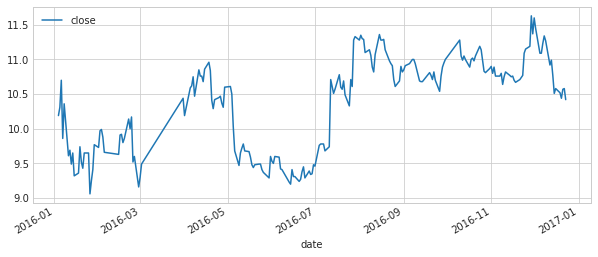

In [44]:
changan['close'].plot(legend=True,figsize=(10,4))

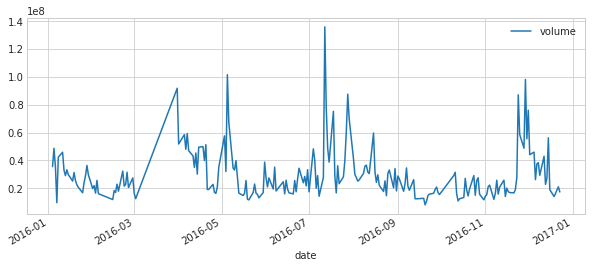

In [45]:
changan['volume'].plot(legend=True,figsize=(10,4))

In [46]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    changan[column_name] = changan['close'].rolling(window=ma).mean()
    #changan[column_name] = pd.rolling_mean(changan['close'],ma)

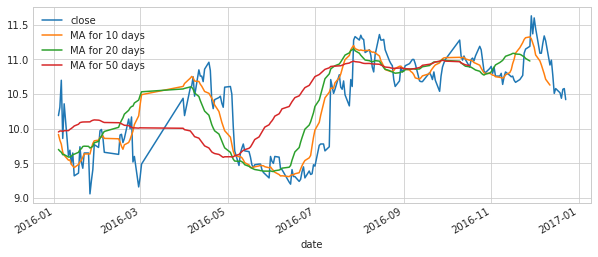

In [47]:
changan[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

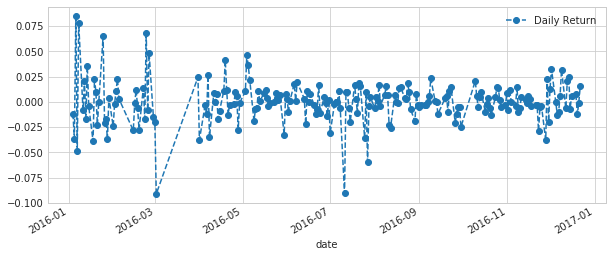

In [48]:
changan['Daily Return'] = changan['close'].pct_change()
changan['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


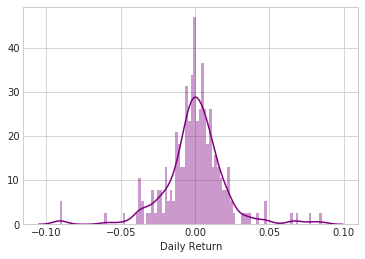

In [49]:
sns.distplot(changan['Daily Return'].dropna(),bins=100, color = 'purple');

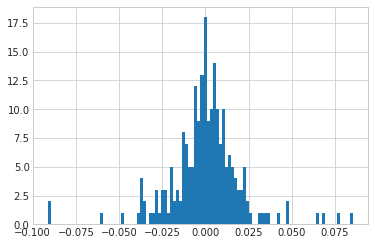

In [50]:
changan['Daily Return'].hist(bins=100)

In [ ]:
#gqjt=pd.read_csv('../data/gqjt_2016.csv',index_col='date',parse_dates=True)

In [51]:
closing_df = pd.DataFrame({'changan':changan['close'],'gqjt':gqjt['close'],'byd':byd['close']})

In [52]:
closing_df.head()

,byd,changan,gqjt
date,,,
2016-01-04,62.08,10.19,15.63
2016-01-05,62.70,10.31,16.24
2016-01-06,63.83,10.70,17.08
2016-01-07,58.54,9.86,15.70
2016-01-08,62.79,10.36,16.94


In [53]:
auto_rets = closing_df.pct_change()

In [54]:
auto_rets.head()

,byd,changan,gqjt
date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.009987,0.011776,0.039028
2016-01-06,0.018022,0.037827,0.051724
2016-01-07,-0.082876,-0.078505,-0.080796
2016-01-08,0.072600,0.050710,0.078981


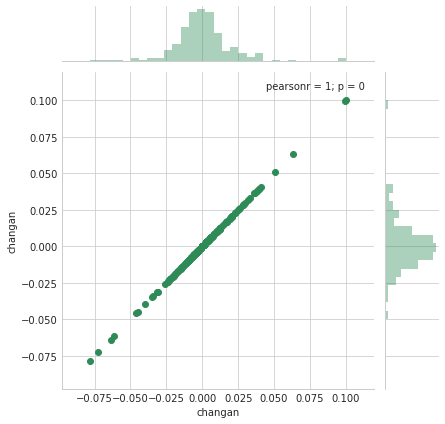

In [55]:
sns.jointplot('changan','changan',auto_rets,
              kind='scatter',color = 'seagreen')

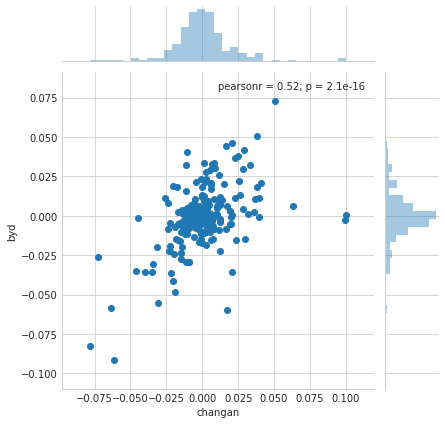

In [56]:
sns.jointplot('changan','byd',auto_rets,kind='scatter')

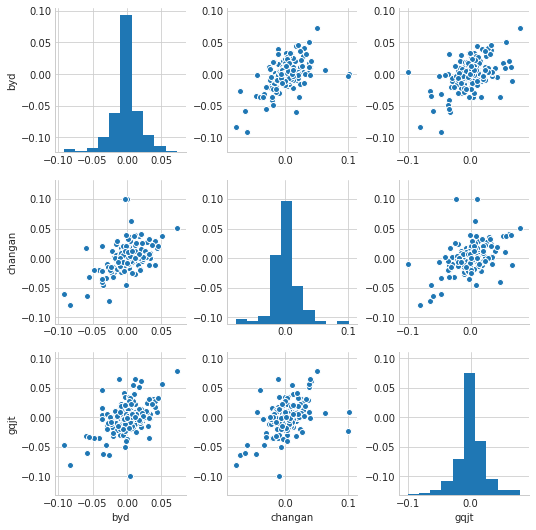

In [57]:
sns.pairplot(auto_rets.dropna())

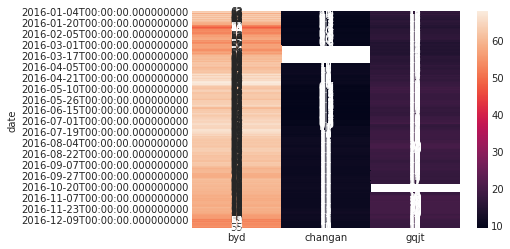

In [59]:
# sns.corrplot(closing_df,annot=True)
sns.heatmap(closing_df,annot=True)

In [60]:
corr=closing_df.corr()
corr

,byd,changan,gqjt
byd,1.000000,-0.007459,0.307699
changan,-0.007459,1.000000,0.503892
gqjt,0.307699,0.503892,1.000000


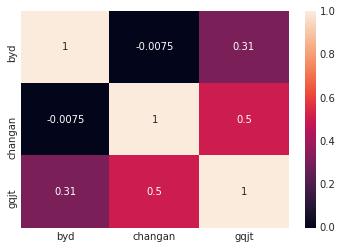

In [61]:
sns.heatmap(corr,annot=True)

In [62]:
sns.heatmap?